In [18]:
"""
@authors: vaaruni, swaathi
"""

'\n@authors: vaaruni, swaathi\n'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
birthRate_df = pd.read_json('cleanedBirthRate.json')

In [3]:
birthRate_df.head()

,Year,Region,Country,Birth rate
0,2001,Eastern Mediterranean,Afghanistan,167.2
1,2002,Eastern Mediterranean,Afghanistan,177.6
2,2003,Eastern Mediterranean,Afghanistan,151.8
3,2004,Eastern Mediterranean,Afghanistan,135.7
4,2005,Eastern Mediterranean,Afghanistan,117.4


In [4]:
birthRate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        2576 non-null   int64  
 1   Region      2576 non-null   object 
 2   Country     2576 non-null   object 
 3   Birth rate  2576 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 80.6+ KB


In [5]:
birthRate_df.describe()

,Year,Birth rate
count,2576.000000,2576.000000
mean,2009.791537,49.917702
std,5.365661,44.693888
min,2001.000000,0.900000
25%,2005.000000,14.000000
50%,2010.000000,34.850000
75%,2014.000000,74.600000
max,2020.000000,230.000000


In [6]:
birthRate_df[birthRate_df['Country'] == 'Afghanistan']

,Year,Region,Country,Birth rate
0,2001,Eastern Mediterranean,Afghanistan,167.2
1,2002,Eastern Mediterranean,Afghanistan,177.6
2,2003,Eastern Mediterranean,Afghanistan,151.8
3,2004,Eastern Mediterranean,Afghanistan,135.7
4,2005,Eastern Mediterranean,Afghanistan,117.4
5,2006,Eastern Mediterranean,Afghanistan,126.2
6,2007,Eastern Mediterranean,Afghanistan,103.0
7,2008,Eastern Mediterranean,Afghanistan,90.0
8,2009,Eastern Mediterranean,Afghanistan,80.0
9,2013,Eastern Mediterranean,Afghanistan,87.0


Unique Regions in the data

In [7]:
birthRate_df['Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

There are 6 regions in the data that the countries are grouped under. They are:


1.   Eastern Mediterranean
2.   Europe
3.   Africa
4.   Americas
5.   Western Pacific
6.   South-East Asia





Top 10 highest birth rate throughout the time period

In [8]:
birthRate_df.sort_values(by='Birth rate', ascending=False).head(10)

,Year,Region,Country,Birth rate
1658,2007,Africa,Niger,230.0
447,2009,Africa,Central African Republic,229.0
448,2010,Africa,Central African Republic,229.0
1659,2009,Africa,Niger,210.0
1661,2012,Africa,Niger,210.0
1660,2010,Africa,Niger,206.1
456,2007,Africa,Chad,203.4
1657,2004,Africa,Niger,199.1
1656,2003,Africa,Niger,198.9
460,2015,Africa,Chad,197.0


Country- Niger seems to have highest birth rate among others. How has birth rate changed over the years in Niger?

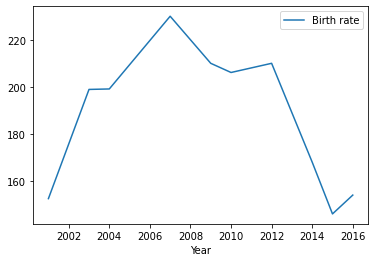

In [9]:
birthRate_df[birthRate_df['Country'] == 'Niger'].plot.line(x='Year', y='Birth rate')

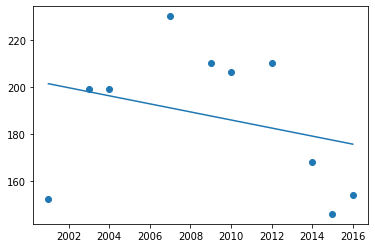

In [10]:
year_niger = birthRate_df[birthRate_df['Country'] == 'Niger']['Year']
brate_niger = birthRate_df[birthRate_df['Country'] == 'Niger']['Birth rate']

#create scatterplot for year and birth rate
plt.scatter(year_niger, brate_niger)

#calculate trendline
z = np.polyfit(year_niger, brate_niger, 1)
p = np.poly1d(z)

#plot trendline
plt.plot(year_niger, p(year_niger))

Though Niger had the highest birth rate among all the countries, the birth rate seems to be declining over the years.

Top 10 data with lowest birth rate 

In [11]:
birthRate_df.sort_values(by='Birth rate', ascending=True, na_position='first').head(10)

,Year,Region,Country,Birth rate
1886,2019,Western Pacific,Republic of Korea,0.9
1885,2018,Western Pacific,Republic of Korea,0.9
1884,2017,Western Pacific,Republic of Korea,1.0
632,2017,South-East Asia,Democratic People's Republic of Korea,1.0
1883,2016,Western Pacific,Republic of Korea,1.3
2005,2011,Europe,San Marino,1.4
1882,2015,Western Pacific,Republic of Korea,1.4
1881,2014,Western Pacific,Republic of Korea,1.6
664,2020,Europe,Denmark,1.6
1876,2009,Western Pacific,Republic of Korea,1.7


Country- Republic of Korea seems to have lowest birth rate among others. How has birth rate changed over the years in Republic of Korea?

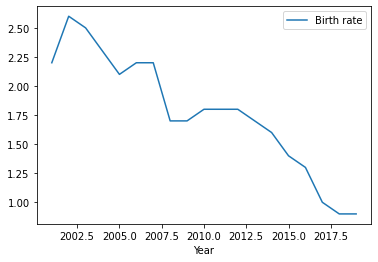

In [12]:
birthRate_df[birthRate_df['Country'] == 'Republic of Korea'].plot.line(x='Year', y='Birth rate')

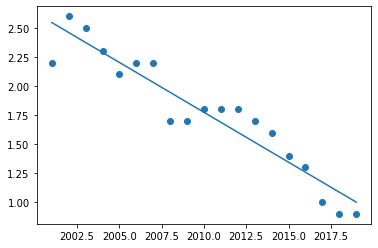

In [13]:
year_skorea = birthRate_df[birthRate_df['Country'] == 'Republic of Korea']['Year']
brate_skorea = birthRate_df[birthRate_df['Country'] == 'Republic of Korea']['Birth rate']

#create scatterplot for year and birth rate
plt.scatter(year_skorea, brate_skorea)

#calculate trendline
z = np.polyfit(year_skorea, brate_skorea, 1)
p = np.poly1d(z)

#plot trendline
plt.plot(year_skorea, p(year_skorea))

Over the 20 years period, the birth rate of Republic of Korea has fluctuated. But ultimately, there has been a decreasing trend.

In [14]:
regions = birthRate_df['Region'].unique()
regionwise_birthrate = []
for region in regions:
  region_df = birthRate_df[birthRate_df['Region'] == region]
  average_by_year = region_df.groupby(['Year'])['Birth rate'].mean()
  average_by_year = average_by_year.reset_index(name = 'brate')
  region_brate = {
      'region': region,
      'year': list(average_by_year['Year']),
      'brate': list(average_by_year['brate'])
  }
  regionwise_birthrate.append(region_brate)

Region-wise Birth rate over the years

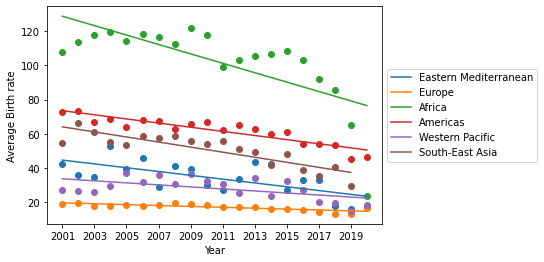

<Figure size 1440x1440 with 0 Axes>

In [17]:
for reg in regionwise_birthrate:
  #create scatterplot for year and birth rate
  plt.scatter(reg['year'], reg['brate'])

  #calculate trendline
  z = np.polyfit(reg['year'], reg['brate'], 1)
  p = np.poly1d(z)

  #plot trendline
  plt.plot(reg['year'], p(reg['year']))

plt.xlabel('Year') 
plt.ylabel('Average Birth rate') 
plt.xticks(np.arange(min(reg['year']), max(reg['year'])+1, 2))
plt.legend(list(regions), loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(20, 20))
plt.show()
    